# Dimensionality Reduction
1. t-SNE
2. PCA
3. umap

In [1]:
using Pkg
Pkg.add("UMAP")
Pkg.add("Makie")
Pkg.add("XLSX")
Pkg.add("VegaDatasets")
Pkg.add("DataFrames")
Pkg.add("MultivariateStats")
Pkg.add("RDatasets")
Pkg.add("StatsBase")
Pkg.add("Statistics")
Pkg.add("LinearAlgebra")
Pkg.add("Plots")
Pkg.add("ScikitLearn")
Pkg.add("MLBase")
Pkg.add("Distances")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed FiniteDiff ───────────── v2.17.0
   Installed ArnoldiMethod ────────── v0.1.0
   Installed ArrayInterfaceCore ───── v0.1.27
   Installed LightGraphs ──────────── v1.3.5
   Installed NearestNeighborDescent ─ v0.3.5
   Installed LsqFit ───────────────── v0.12.1
   Installed OptimBase ────────────── v2.0.2
   Installed UMAP ─────────────────── v0.1.9
   Installed NLSolversBase ────────── v7.8.3
    Updating `~/.julia/environments/v1.8/Project.toml`
  [c4f8c510] + UMAP v0.1.9
    Updating `~/.julia/environments/v1.8/Manifest.toml`
⌅ [ec485272] ↓ ArnoldiMethod v0.2.0 ⇒ v0.1.0
  [30b0a656] + ArrayInterfaceCore v0.1.27
  [6a86dc24] + FiniteDiff v2.17.0
  [093fc24a] + LightGraphs v1.3.5
⌅ [2fda8390] + LsqFit v0.12.1
  [d41bc354] + NLSolversBase v7.8.3
  [dd2c4c9e] + NearestNeighborDescent v0.3.5
  [87e2bd06] + OptimBase v2.0.2
  [c4f8c510] + UMAP v0.1.9
        Info Packages marked with ⌅ 

In [1]:
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances

In [2]:
C = DataFrame(VegaDatasets.dataset("cars"))

Row,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
,String,Float64?,Int64,Float64,Int64?,Int64,Float64,String,String
1,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,1970-01-01,USA
2,buick skylark 320,15.0,8,350.0,165,3693,11.5,1970-01-01,USA
3,plymouth satellite,18.0,8,318.0,150,3436,11.0,1970-01-01,USA
4,amc rebel sst,16.0,8,304.0,150,3433,12.0,1970-01-01,USA
5,ford torino,17.0,8,302.0,140,3449,10.5,1970-01-01,USA
6,ford galaxie 500,15.0,8,429.0,198,4341,10.0,1970-01-01,USA
7,chevrolet impala,14.0,8,454.0,220,4354,9.0,1970-01-01,USA
8,plymouth fury iii,14.0,8,440.0,215,4312,8.5,1970-01-01,USA
9,pontiac catalina,14.0,8,455.0,225,4425,10.0,1970-01-01,USA


In [3]:
dropmissing!(C)
M = Matrix(C[:, 2:7])
names(C)

9-element Vector{String}:
 "Name"
 "Miles_per_Gallon"
 "Cylinders"
 "Displacement"
 "Horsepower"
 "Weight_in_lbs"
 "Acceleration"
 "Year"
 "Origin"

In [4]:
car_origin = C[:, :Origin]
car_map = labelmap(car_origin) # from MLBase
unique_ids = labelencode(car_map, car_origin)

392-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 2
 1
 1
 1
 3
 1
 1
 1

### 1️⃣ PCA

In [5]:
# center and normalize the data
data = M
data = (data .- mean(data,dims = 1))./ std(data,dims=1)

392×6 Matrix{Float64}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
 -1.08212    1.48205    1.80219    1.70248    0.689209   -2.00855
 -1.21024    1.48205    1.39127    1.44268    0.743365   -2.73349
 -1.08212    1.48205    1.96464    1.18288    0.922314   -2.18979
  ⋮                                                       ⋮
  0.199113   0.309571  -0.128168   0.143685  -0.0383613   0

PCA expects each column to be an observation, so we take transpose of it.

In [6]:
# each car is now a column
data'

6×392 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.697747  -1.08212   -0.697747  …   1.09597    0.583482   0.967851
  1.48205    1.48205    1.48205      -0.862911  -0.862911  -0.862911
  1.07591    1.48683    1.18103      -0.567753  -0.711097  -0.720653
  0.663285   1.57258    1.18288      -0.531795  -0.661694  -0.583754
  0.619748   0.842258   0.539692     -0.803605  -0.415097  -0.303253
 -1.28362   -1.46485   -1.64609   …  -1.4286     1.10867    1.39865

First, we will fit the model via PCA. `maxoutdim` is the output dimensions, we want it to be 2 in this case.

In [7]:
p = fit(PCA, data', maxoutdim=2)

PCA(indim = 6, outdim = 2, principalratio = 0.9194828785333575)

Pattern matrix (unstandardized loadings):
───────────────────────
         PC1        PC2
───────────────────────
1  -0.873037  -0.20899
2   0.942277   0.126601
3   0.97054    0.092613
4   0.94995   -0.141833
5   0.941156   0.244211
6  -0.638795   0.761967
───────────────────────

Importance of components:
─────────────────────────────────────────────
                                PC1       PC2
─────────────────────────────────────────────
SS Loadings (Eigenvalues)  4.78827   0.728631
Variance explained         0.798044  0.121439
Cumulative variance        0.798044  0.919483
Proportion explained       0.867927  0.132073
Cumulative proportion      0.867927  1.0
─────────────────────────────────────────────

We can call the projection matrix by calling the function `projection`

In [8]:
P = projection(p)

6×2 Matrix{Float64}:
  0.398973  -0.244835
 -0.430615   0.148314
 -0.443531   0.108497
 -0.434122  -0.166158
 -0.430103   0.286095
  0.291926   0.892652

Now that we have projection matrix, `P`, we can apply it on one car:

In [9]:
P' * (data[1, :] - mean(p))

2-element Vector{Float64}:
 -2.323001696522692
 -0.5713519642644695

Or we can transform all the data via the `transform` function

In [10]:
Yte = MultivariateStats.transform(p, data')
# Note that Yte[:, 1] is same as P' * (data[1, :] - mean(p))

2×392 Matrix{Float64}:
 -2.323     -3.20196  -2.66658   -2.60214   …   1.22011  1.70921   1.86951
 -0.571352  -0.68187  -0.992744  -0.621975     -1.87471  0.632857  0.815607

In [11]:
# reconstruct testing observations
Xr = reconstruct(p, Yte)

6×392 Matrix{Float64}:
 -0.786928  -1.11055  -0.820834  …   0.945785   0.526984   0.546196
  0.91558    1.27768   1.00103      -0.803445  -0.64215   -0.684075
  0.968334   1.34619   1.075        -0.744559  -0.689425  -0.740696
  1.1034     1.50334   1.32257      -0.218179  -0.847159  -0.947116
  0.835669   1.18209   0.862883     -1.06112   -0.554079  -0.570742
 -1.18816   -1.54341  -1.66462   …  -1.31728    1.06388    1.27381

In [12]:
norm(data' -Xr)

13.743841055569009

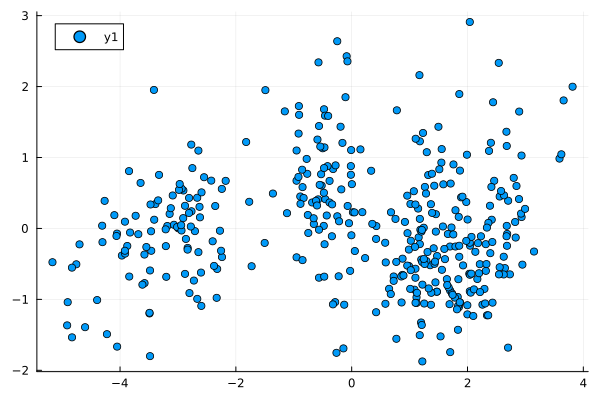

In [13]:
Plots.scatter(Yte[1,:], Yte[2,:])

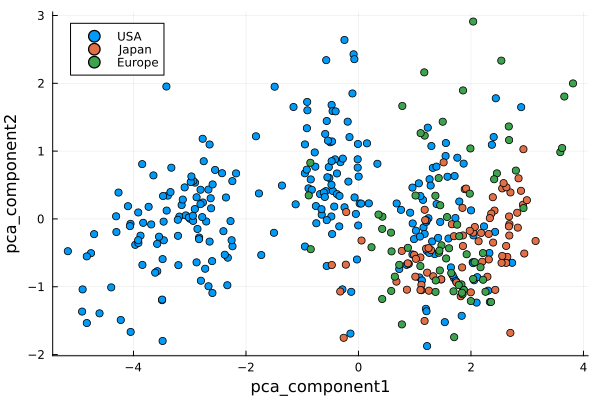

In [17]:
Plots.scatter(Yte[1, car_origin .== "USA"], Yte[2, car_origin .== "USA"], color=1, label="USA")
Plots.xlabel!("pca_component1")
Plots.ylabel!("pca_component2")
Plots.scatter!(Yte[1, car_origin .== "Japan"], Yte[2, car_origin .== "Japan"], color=2, label="Japan")
Plots.scatter!(Yte[1, car_origin .== "Europe"], Yte[2, car_origin .== "Europe"], color=3, label="Europe")

In [20]:
p = fit(PCA, data', maxoutdim=3)

PCA(indim = 6, outdim = 3, principalratio = 0.9625607644667088)

Pattern matrix (unstandardized loadings):
──────────────────────────────────
         PC1        PC2        PC3
──────────────────────────────────
1  -0.873037  -0.20899   0.43321
2   0.942277   0.126601  0.203523
3   0.97054    0.092613  0.151251
4   0.94995   -0.141833  0.0114899
5   0.941156   0.244211  0.0633985
6  -0.638795   0.761967  0.0484404
──────────────────────────────────

Importance of components:
────────────────────────────────────────────────────────
                                PC1       PC2        PC3
────────────────────────────────────────────────────────
SS Loadings (Eigenvalues)  4.78827   0.728631  0.258467
Variance explained         0.798044  0.121439  0.0430779
Cumulative variance        0.798044  0.919483  0.962561
Proportion explained       0.829085  0.126162  0.0447534
Cumulative proportion      0.829085  0.955247  1.0
────────────────────────────────────────────────────────

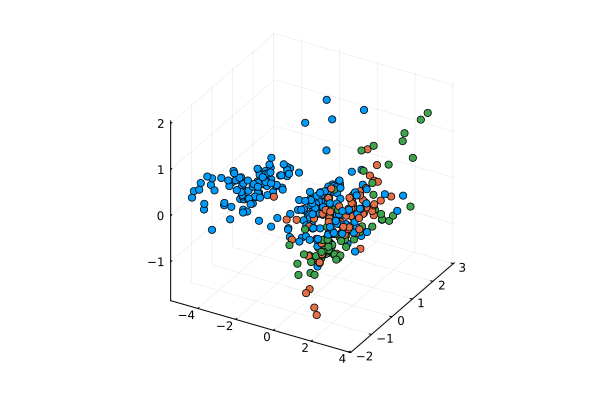

In [21]:
Yte = MultivariateStats.transform(p, data')
scatter3d(Yte[1, :], Yte[2, :], Yte[3, :], color=unique_ids, legend=false)

For better 3d visualizations, we'll use `Mackie`

In [23]:
import Pkg
Pkg.add("GLMakie")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed ModernGL ─────────── v1.1.6
   Installed GLMakie ──────────── v0.8.0
   Installed ShaderAbstractions ─ v0.2.9
   Installed GLFW ─────────────── v3.4.1
   Installed MeshIO ───────────── v0.4.10
    Updating `~/.julia/environments/v1.8/Project.toml`
⌃ [e9467ef8] + GLMakie v0.8.0
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [f7f18e0c] + GLFW v3.4.1
⌃ [e9467ef8] + GLMakie v0.8.0
  [7269a6da] + MeshIO v0.4.10
  [66fc600b] + ModernGL v1.1.6
  [65257c39] + ShaderAbstractions v0.2.9
        Info Packages marked with ⌃ have new versions available
    Building ModernGL → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/cb7f10a4e69af6d022747ff181e3976f3de34408/build.log`
Precompiling project...
  ✓ GLFW
  ✓ ModernGL
  ✓ ShaderAbstractions
  ✓ MeshIO
  ✓ GLMakie
  5 dependencies successfully precompiled in 55 seconds. 393 already precompiled.


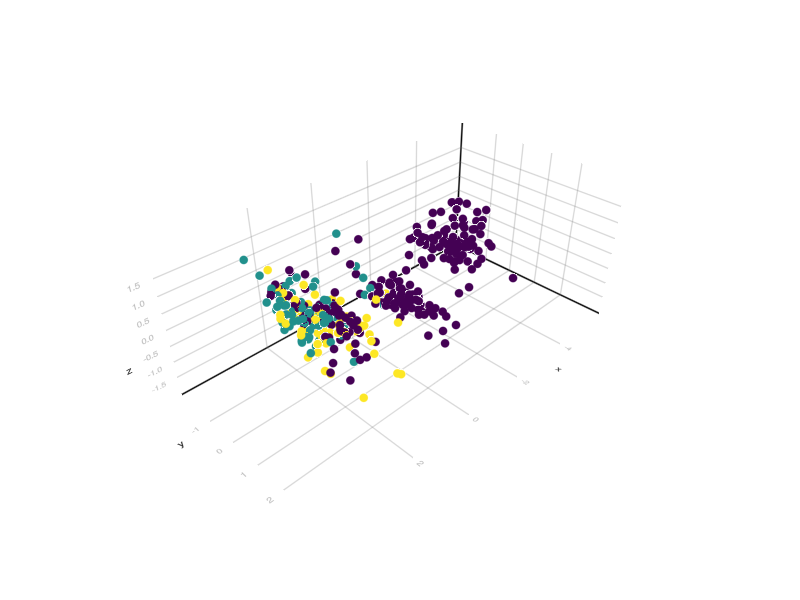

In [24]:
using GLMakie
scene = Makie.scatter(Yte[1,:], Yte[2,:], Yte[3,:], color=unique_ids)

In [26]:
display(scene) # creates an interactive GUI

GLMakie.Screen(...)

### 2️⃣ t-SNE

/usr/lib64/python3.11/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


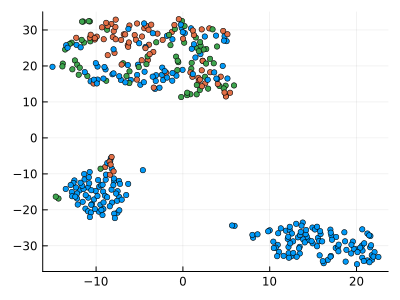

In [28]:
@sk_import manifold : TSNE
tfn = TSNE(n_components = 2)
Y2 = tfn.fit_transform(data);
Plots.scatter(Y2[:,1],Y2[:,2],color=unique_ids,legend=false,size=(400,300),markersize=3)

### 3️⃣ UMAP

In [29]:
L = cor(data, data, dims=2)
embedding = umap(L, 2)

2×392 Matrix{Float64}:
 7.48907  7.98775  7.67465  7.74064  7.59159  …  -4.5773   -5.68516  -6.00449
 5.52113  5.44729  6.08833  5.35175  5.95689      4.93692  -2.91795  -2.78214

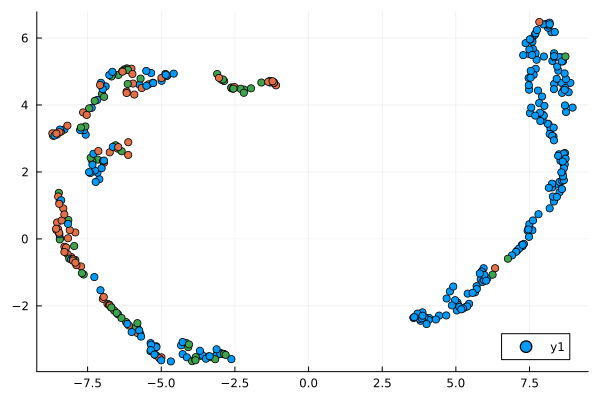

In [30]:
Plots.scatter(embedding[1,:], embedding[2,:], color=unique_ids)

For UMAP, we can create distances between every pair of observations differently, if we choose to. But even with both choices, we will see that UMAP generates a very similar pattern to what we have observed with t-SNE and PCA.

In [31]:
L = pairwise(Euclidean(), data, data, dims=1)
embedding = umap(-L, 2)

2×392 Matrix{Float64}:
 -7.52775  -7.85271  -7.21566   -7.34906  …   6.30392   3.23071   3.16972
  1.68262  -1.26288   0.986306   1.01059     -1.54995  -1.59263  -1.79177

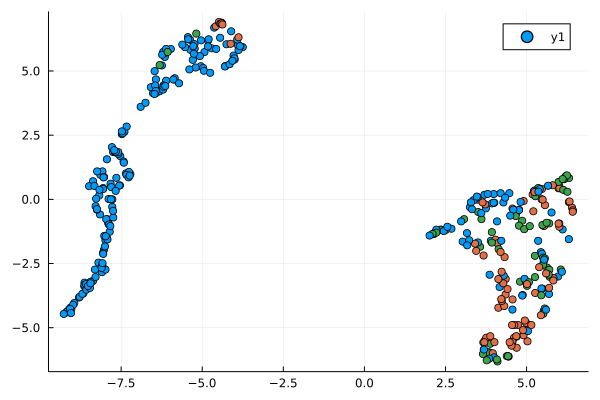

In [32]:
Plots.scatter(embedding[1,:], embedding[2,:], color=unique_ids)